**Name: Berkay Koçak**

**Student ID: 614468**

**E-mail: kocakberkayy@gmail.com**

# A benchmark analysis of methods applied to tackle severe class imbalance for predicting converting sessions of an e-commerce business

## Table of Contents

* [1.       DATA-LEVEL SOLUTIONS](#1.)
* [1.1.     Undersampling](#1.1.)
* [1.1.1.   Random Undersampling](#1.1.1.)
* [1.1.1.1. Random Undersampling with Logistic Regression - Bayesian Search](#1.1.1.1.)
* [1.1.1.2. Random Undersampling with Logistic Regression](#1.1.1.2.)
* [1.1.1.3. Random Undersampling with XGB - Bayesian Search](#1.1.1.3.)
* [1.1.1.4. Random Undersampling with XGB](#1.1.1.4.)
* [1.1.1.5. Random Undersampling with RF - Bayesian Search](#1.1.1.5.)
* [1.1.1.6. Random Undersampling with RF](#1.1.1.6.)
* [1.2.     Oversampling](#1.2.)
* [1.2.1.   SMOTE](#1.2.1.)
* [1.2.1.1. SMOTE with Logistic Regression](#1.2.1.1.)
* [1.2.1.2. SMOTE with XGB](#1.2.1.2.)
* [1.2.1.3. SMOTE with RF](#1.2.1.3.)
* [1.2.2.   Borderline SMOTE](#1.2.2.)
* [1.2.2.1. Borderline SMOTE with Logistic Regression](#1.2.2.1.)
* [1.2.2.2. Borderline SMOTE with XGB](#1.2.2.2.)
* [1.2.2.3. Borderline SMOTE with RF](#1.2.2.3.)
* [1.2.3.   ADASYN](#1.2.3.)
* [1.2.3.1. ADASYN with Logistic Regression](#1.2.3.1.)
* [1.2.3.2. ADASYN with XGB](#1.2.3.2.)
* [1.2.3.3. ADASYN with RF](#1.2.3.3.)
* [1.3.     Hybrid Sampling](#1.3.)
* [1.3.1.   SMOTE and Random Undersampling](#1.3.1.)
* [1.3.1.1. SMOTE and Random Undersampling with Logistic Regression](#1.3.1.1.)
* [1.3.1.2. SMOTE and Random Undersampling with XGB](#1.3.1.2.)
* [1.3.1.3. SMOTE and Random Undersampling with RF](#1.3.1.3.)
* [2.       ALGORITHM-LEVEL SOLUTIONS](#2.)
* [2.1.     Cost-Sensitive Learning](#2.1.)
* [2.1.1.   Cost-Sensitive Learning with Logistic Regression](#2.1.1.)
* [2.1.2.   Cost-Sensitive Learning with XGB - Bayesian Search](#2.1.2.)
* [2.1.3.   Cost-Sensitive Learning with XGB](#2.1.3.)
* [2.1.3.1. Further Thresholding ](#2.1.3.1.)
* [2.1.4.   Cost-Sensitive Learning with RF - Bayesian Search](#2.1.4.)
* [2.1.5.   Cost-Sensitive Learning with RF](#2.1.5.)

In [11]:
#pip install imbalanced-learn
from imblearn.over_sampling import ADASYN, BorderlineSMOTE, SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, roc_curve, confusion_matrix, average_precision_score,auc , precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from xgboost import XGBClassifier
import imblearn
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns
import sklearn
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the preprocessed train & test data and labels from disc.
with open('X_train.pkl', 'rb') as file_name:
    X_train = pickle.load(file_name)
with open('X_test.pkl', 'rb') as file_name:
    X_test = pickle.load(file_name)
with open('y_train.pkl', 'rb') as file_name:
    y_train = pickle.load(file_name)
with open('y_test.pkl', 'rb') as file_name:
    y_test = pickle.load(file_name)

In [3]:
# The value counts for the output variable that shows class imbalance
y_train.value_counts()

is_converted
False           314415
True              1295
dtype: int64

# 1. DATA-LEVEL SOLUTIONS <a class="anchor" id="1."></a>

# 1.1. Undersampling<a class="anchor" id="1.1."></a>

## 1.1.1. Random Undersampling<a class="anchor" id="1.1.1."></a>

### 1.1.1.1. Random Undersampling with Logistic Regression - Bayesian Search<a class="anchor" id="1.1.1.1."></a>

In [349]:
# Define the pipeline
pipeline22 = imbpipeline(steps = [['under', RandomUnderSampler(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', LogisticRegression()]])

# Define the parameter grid for Logistic Regression
param_grid22 = {
              'classifier__random_state':[11],
              "classifier__penalty": ["l2"],
              "classifier__C": Real(0.001, 1000),
              'classifier__max_iter': Integer(1000, 5000),
              'classifier__fit_intercept': Categorical([True, False])
              
               }

# Define the cross validation structure
stratified_kfold22 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [350]:
# Bayesian Search
grid_search22 = BayesSearchCV(estimator=pipeline22,
                           search_spaces=param_grid22,
                           scoring='average_precision',
                           cv=stratified_kfold22,
                           n_jobs=-1,
                           verbose=0)

In [351]:
# Fitting the model and predicting output probabilities
model22= grid_search22.fit(X_train, y_train.values.ravel())
y_pred_prob22= model22.predict_proba(X_test)[:, 1]

In [352]:
model22.best_params_

OrderedDict([('classifier__C', 835.8607864927899),
             ('classifier__fit_intercept', True),
             ('classifier__max_iter', 1000),
             ('classifier__penalty', 'l2'),
             ('classifier__random_state', 11)])

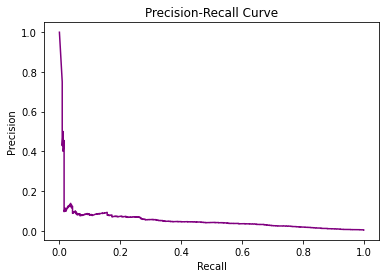

In [353]:
precision22, recall22, thresholds22 = precision_recall_curve(y_test, y_pred_prob22)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall22, precision22, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [354]:
# Calculating the scores
avg_precision_val_22= model22.best_score_
avg_precision_test_22= model22.score(X_test, y_test)
auc_pr_test_22 = auc(recall22, precision22)

In [355]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_22))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_22))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_22))

Avg Precision on Validation Set : 0.0536
Avg Precision on Test Set       : 0.0559
PR-AUC Score on Test Set        : 0.0541


### 1.1.1.2. Random Undersampling with Logistic Regression<a class="anchor" id="1.1.1.2."></a>

In [133]:
# Define the pipeline
pipeline16 = imbpipeline(steps = [['under', RandomUnderSampler(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', LogisticRegression()]])

# Define the parameter grid for Logistic Regression
param_grid16 = {'classifier__max_iter':[3538],
              'classifier__random_state':[11],
              "classifier__penalty": ["l2"],
              "classifier__C": [911.8],
              "classifier__fit_intercept": [True]}

# Define the cross validation structure
stratified_kfold16 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [134]:
# Grid Search
grid_search16 = GridSearchCV(estimator=pipeline16,
                           param_grid=param_grid16,
                           scoring='average_precision',
                           cv=stratified_kfold16,
                           n_jobs=-1,
                           verbose=0)

In [135]:
# Fitting the model and predicting output probabilities
model16= grid_search16.fit(X_train, y_train.values.ravel())
y_pred_prob16= model16.predict_proba(X_test)[:, 1]

In [136]:
model16.best_params_

{'classifier__C': 911.8,
 'classifier__fit_intercept': True,
 'classifier__max_iter': 3538,
 'classifier__penalty': 'l2',
 'classifier__random_state': 11}

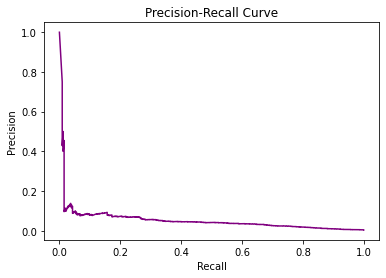

In [137]:
precision16, recall16, thresholds16 = precision_recall_curve(y_test, y_pred_prob16)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall16, precision16, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [138]:
# Calculating the scores
avg_precision_val_16= model16.best_score_
avg_precision_test_16= model16.score(X_test, y_test)
auc_pr_test_16 = auc(recall16, precision16)

In [139]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_16))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_16))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_16))

Avg Precision on Validation Set : 0.0536
Avg Precision on Test Set       : 0.0559
PR-AUC Score on Test Set        : 0.0541


### 1.1.1.3. Random Undersampling with XGB - Bayesian Search<a class="anchor" id="1.1.1.3."></a>

In [41]:
# Define the pipeline
pipeline19 = imbpipeline(steps = [['under', RandomUnderSampler(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', XGBClassifier()]])

# Define the parameter grid for XGB

param_grid19 = {
    'classifier__objective':['binary:logistic'],
    'classifier__random_state': [11],
    'classifier__learning_rate': Real(0.01, 0.2, prior="log-uniform"),
    'classifier__subsample': Real(0.5, 1),
    'classifier__colsample_bytree': Real(0.5, 1),
    'classifier__n_estimators': Integer(1, 5000),
    'classifier__max_depth': Integer(2, 10)
}

# Define the cross validation structure
stratified_kfold19 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [43]:
# Bayesian Search
grid_search19 = BayesSearchCV(estimator=pipeline19,
                           search_spaces=param_grid19,
                           scoring='average_precision',
                           cv=stratified_kfold19,
                           n_jobs=-1,
                           verbose=0)

In [44]:
# Fitting the model and predicting output probabilities
model19= grid_search19.fit(X_train, y_train.values.ravel())
y_pred_prob19=model19.predict_proba(X_test)[:, 1]

In [45]:
model19.best_params_

OrderedDict([('classifier__colsample_bytree', 0.7766881059271216),
             ('classifier__learning_rate', 0.01),
             ('classifier__max_depth', 3),
             ('classifier__n_estimators', 1684),
             ('classifier__objective', 'binary:logistic'),
             ('classifier__random_state', 11),
             ('classifier__subsample', 0.970389774356015)])

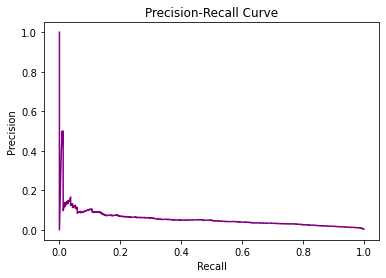

In [46]:
precision19, recall19, thresholds19 = precision_recall_curve(y_test, y_pred_prob19)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall19, precision19, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [47]:
# Calculating the scores
avg_precision_val_19= model19.best_score_
avg_precision_test_19= model19.score(X_test, y_test)
auc_pr_test_19 = auc(recall19, precision19)

In [48]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_19))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_19))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_19))

Avg Precision on Validation Set : 0.0650
Avg Precision on Test Set       : 0.0554
PR-AUC Score on Test Set        : 0.0534


### 1.1.1.4. Random Undersampling with XGB<a class="anchor" id="1.1.1.4."></a>

In [223]:
# Define the pipeline
pipeline17 = imbpipeline(steps = [['under', RandomUnderSampler(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', XGBClassifier()]])

# Define the parameter grid for XGB

param_grid17 = {
    'classifier__objective':['binary:logistic'],
    'classifier__random_state': [11],
    'classifier__learning_rate': [0.01],
    'classifier__subsample': [0.805,0.970],
    'classifier__colsample_bytree': [0.776,1] ,
    'classifier__n_estimators': [5000],
    'classifier__max_depth': [3,9]
}

# Define the cross validation structure
stratified_kfold17 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [224]:
# Grid Search
grid_search17 = GridSearchCV(estimator=pipeline17,
                           param_grid=param_grid17,
                           scoring='average_precision',
                           cv=stratified_kfold17,
                           n_jobs=-1,
                           verbose=0)

In [225]:
# Fitting the model and predicting output probabilities
model17= grid_search17.fit(X_train, y_train.values.ravel())
y_pred_prob17=model17.predict_proba(X_test)[:, 1]

In [226]:
model17.best_params_

{'classifier__colsample_bytree': 1,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': 9,
 'classifier__n_estimators': 5000,
 'classifier__objective': 'binary:logistic',
 'classifier__random_state': 11,
 'classifier__subsample': 0.805}

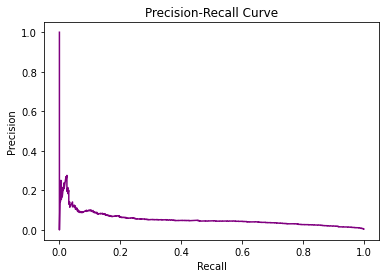

In [227]:
precision17, recall17, thresholds17 = precision_recall_curve(y_test, y_pred_prob17)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall17, precision17, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [228]:
# Calculating the scores
avg_precision_val_17= model17.best_score_
avg_precision_test_17= model17.score(X_test, y_test)
auc_pr_test_17 = auc(recall17, precision17)

In [229]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_17))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_17))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_17))

Avg Precision on Validation Set : 0.0597
Avg Precision on Test Set       : 0.0536
PR-AUC Score on Test Set        : 0.0523


### 1.1.1.5. Random Undersampling with RF - Bayesian Search<a class="anchor" id="1.1.1.5."></a>

In [73]:
# Define the pipeline
pipeline21 = imbpipeline(steps = [['under', RandomUnderSampler(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', RandomForestClassifier()]])

# Define the parameter grid for RF

param_grid21 = {
    'classifier__random_state': [11],
    'classifier__max_features': Integer(1, 20),
    'classifier__max_depth': Integer(2, 10),
    'classifier__min_samples_split': Integer(2, 100),
    'classifier__n_estimators': Integer(100, 5000),
    'classifier__min_samples_leaf': Integer(1, 50),
    'classifier__bootstrap': Categorical([True, False])
}


# Define the cross validation structure
stratified_kfold21 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [74]:
# Bayesian Search
grid_search21 = BayesSearchCV(estimator=pipeline21,
                           search_spaces=param_grid21,
                           scoring='average_precision',
                           cv=stratified_kfold21,
                           n_jobs=-1,
                           verbose=0)

In [75]:
# Fitting the model and predicting output probabilities
model21= grid_search21.fit(X_train, y_train.values.ravel())
y_pred_prob21=model21.predict_proba(X_test)[:, 1]

In [76]:
model21.best_params_

OrderedDict([('classifier__bootstrap', False),
             ('classifier__max_depth', 10),
             ('classifier__max_features', 20),
             ('classifier__min_samples_leaf', 1),
             ('classifier__min_samples_split', 2),
             ('classifier__n_estimators', 5000),
             ('classifier__random_state', 11)])

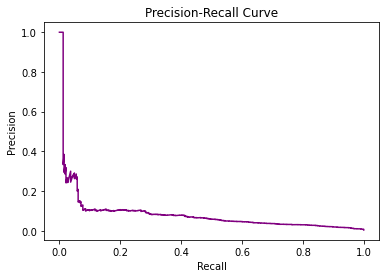

In [77]:
precision21, recall21, thresholds21 = precision_recall_curve(y_test, y_pred_prob21)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall21, precision21, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [78]:
# Calculating the scores
avg_precision_val_21= model21.best_score_
avg_precision_test_21= model21.score(X_test, y_test)
auc_pr_test_21 = auc(recall21, precision21)

In [79]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_21))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_21))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_21))

Avg Precision on Validation Set : 0.0692
Avg Precision on Test Set       : 0.0824
PR-AUC Score on Test Set        : 0.0816


### 1.1.1.6. Random Undersampling with RF<a class="anchor" id="1.1.1.6."></a>

In [213]:
# Define the pipeline
pipeline18 = imbpipeline(steps = [['under', RandomUnderSampler(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', RandomForestClassifier()]])

# Define the parameter grid for RF


param_grid18 = {
    'classifier__random_state': [11],
    'classifier__max_depth': [10] ,
    'classifier__n_estimators': [5000],
    'classifier__max_features': [20,None],
    'classifier__bootstrap': [False]
    
}


# Define the cross validation structure
stratified_kfold18 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [214]:
# Grid Search
grid_search18 = GridSearchCV(estimator=pipeline18,
                           param_grid=param_grid18,
                           scoring='average_precision',
                           cv=stratified_kfold18,
                           n_jobs=-1,
                           verbose=0)

In [215]:
# Fitting the model and predicting output probabilities
model18= grid_search18.fit(X_train, y_train.values.ravel())
y_pred_prob18=model18.predict_proba(X_test)[:, 1]

In [216]:
model18.best_params_

{'classifier__bootstrap': False,
 'classifier__max_depth': 10,
 'classifier__max_features': 20,
 'classifier__n_estimators': 5000,
 'classifier__random_state': 11}

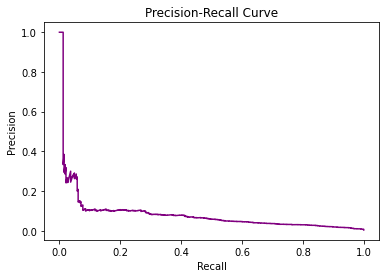

In [217]:
precision18, recall18, thresholds18 = precision_recall_curve(y_test, y_pred_prob18)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall18, precision18, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [218]:
# Calculating the scores
avg_precision_val_18= model18.best_score_
avg_precision_test_18= model18.score(X_test, y_test)
auc_pr_test_18 = auc(recall18, precision18)

In [219]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_18))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_18))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_18))

Avg Precision on Validation Set : 0.0692
Avg Precision on Test Set       : 0.0824
PR-AUC Score on Test Set        : 0.0816


# 1.2. Oversampling<a class="anchor" id="1.2."></a>

## 1.2.1. SMOTE<a class="anchor" id="1.2.1."></a>

### 1.2.1.1. SMOTE with Logistic Regression<a class="anchor" id="1.2.1.1."></a>

In [126]:
# Define the pipeline
pipeline1 = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', LogisticRegression()]])

# Define the parameter grid for Logistic Regression
param_grid1 =  {'classifier__max_iter':[3538],
              'classifier__random_state':[11],
              "classifier__penalty": ["l2"],
              "classifier__C": [911.8],
              "classifier__fit_intercept": [True]}


# Define the cross validation structure
stratified_kfold1 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [127]:
# Grid Search
grid_search1 = GridSearchCV(estimator=pipeline1,
                           param_grid=param_grid1,
                           scoring='average_precision',
                           cv=stratified_kfold1,
                           n_jobs=-1,
                           verbose=0)

In [128]:
# Fitting the model and predicting output probabilities
model1= grid_search1.fit(X_train, y_train.values.ravel())
y_pred_prob1= model1.predict_proba(X_test)[:, 1]

In [129]:
model1.best_params_

{'classifier__C': 911.8,
 'classifier__fit_intercept': True,
 'classifier__max_iter': 3538,
 'classifier__penalty': 'l2',
 'classifier__random_state': 11}

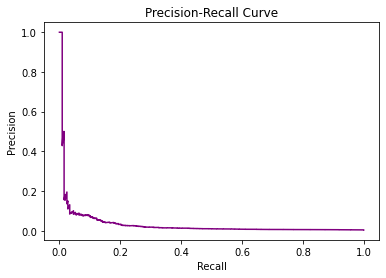

In [130]:
precision1, recall1, thresholds1 = precision_recall_curve(y_test, y_pred_prob1)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall1, precision1, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [131]:
# Calculating the scores
avg_precision_val_1= model1.best_score_
avg_precision_test_1= model1.score(X_test, y_test)
auc_pr_test_1 = auc(recall1, precision1)

In [132]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_1))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_1))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_1))

Avg Precision on Validation Set : 0.0313
Avg Precision on Test Set       : 0.0339
PR-AUC Score on Test Set        : 0.0333


### 1.2.1.2. SMOTE with XGB<a class="anchor" id="1.2.1.2."></a>

In [230]:
# Define the pipeline
pipeline2 = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', XGBClassifier()]])

# Define the parameter grid for XGB

param_grid2 = {
    'classifier__objective':['binary:logistic'],
    'classifier__random_state': [11],
    'classifier__learning_rate': [0.01],
    'classifier__subsample': [0.805,0.970],
    'classifier__colsample_bytree': [0.776,1] ,
    'classifier__n_estimators': [5000],
    'classifier__max_depth': [3,9]
}

# Define the cross validation structure
stratified_kfold2 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [231]:
# Grid Search
grid_search2 = GridSearchCV(estimator=pipeline2,
                           param_grid=param_grid2,
                           scoring='average_precision',
                           cv=stratified_kfold2,
                           n_jobs=-1,
                           verbose=0)

In [232]:
# Fitting the model and predicting output probabilities
model2= grid_search2.fit(X_train, y_train.values.ravel())
y_pred_prob2=model2.predict_proba(X_test)[:, 1]

In [233]:
model2.best_params_

{'classifier__colsample_bytree': 0.776,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': 9,
 'classifier__n_estimators': 5000,
 'classifier__objective': 'binary:logistic',
 'classifier__random_state': 11,
 'classifier__subsample': 0.97}

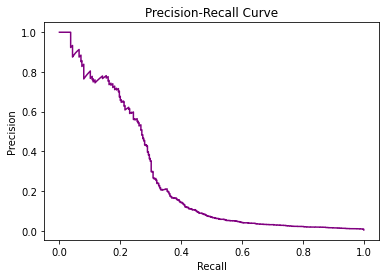

In [234]:
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_pred_prob2)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall2, precision2, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [235]:
# Calculating the scores
avg_precision_val_2= model2.best_score_
avg_precision_test_2= model2.score(X_test, y_test)
auc_pr_test_2 = auc(recall2, precision2)

In [236]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_2))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_2))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_2))

Avg Precision on Validation Set : 0.2318
Avg Precision on Test Set       : 0.2656
PR-AUC Score on Test Set        : 0.2649


### 1.2.1.3. SMOTE with RF<a class="anchor" id="1.2.1.3."></a>

In [168]:
# Define the pipeline
pipeline3 = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', RandomForestClassifier()]])

# Define the parameter grid for RF

param_grid3 = {
    'classifier__random_state': [11],
    'classifier__max_depth': [10] ,
    'classifier__n_estimators': [5000],
    'classifier__max_features': [20,None],
    'classifier__bootstrap': [False]
    
}


# Define the cross validation structure
stratified_kfold3 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [169]:
# Grid Search
grid_search3 = GridSearchCV(estimator=pipeline3,
                           param_grid=param_grid3,
                           scoring='average_precision',
                           cv=stratified_kfold3,
                           n_jobs=-1,
                           verbose=0)

In [170]:
# Fitting the model and predicting output probabilities
model3= grid_search3.fit(X_train, y_train.values.ravel())
y_pred_prob3=model3.predict_proba(X_test)[:, 1]

In [171]:
model3.best_params_

{'classifier__bootstrap': False,
 'classifier__max_depth': 10,
 'classifier__max_features': 20,
 'classifier__n_estimators': 5000,
 'classifier__random_state': 11}

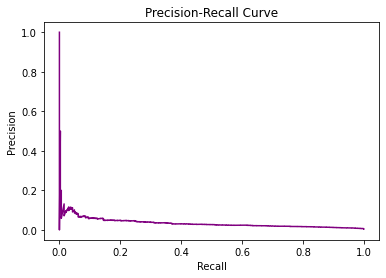

In [172]:
precision3, recall3, thresholds3 = precision_recall_curve(y_test, y_pred_prob3)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall3, precision3, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [173]:
# Calculating the scores
avg_precision_val_3= model3.best_score_
avg_precision_test_3= model3.score(X_test, y_test)
auc_pr_test_3 = auc(recall3, precision3)

In [174]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_3))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_3))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_3))

Avg Precision on Validation Set : 0.0298
Avg Precision on Test Set       : 0.0354
PR-AUC Score on Test Set        : 0.0339


## 1.2.2. Borderline SMOTE<a class="anchor" id="1.2.2."></a>

### 1.2.2.1. Borderline SMOTE with Logistic Regression<a class="anchor" id="1.2.2.1."></a>

In [147]:
# Define the pipeline
pipeline7 = imbpipeline(steps = [['over', BorderlineSMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', LogisticRegression()]])

# Define the parameter grid for Logistic Regression
param_grid7 = {'classifier__max_iter':[3538],
              'classifier__random_state':[11],
              "classifier__penalty": ["l2"],
              "classifier__C": [911.8],
              "classifier__fit_intercept": [True]}

# Define the cross validation structure
stratified_kfold7 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [148]:
# Grid Search
grid_search7 = GridSearchCV(estimator=pipeline7,
                           param_grid=param_grid7,
                           scoring='average_precision',
                           cv=stratified_kfold7,
                           n_jobs=-1,
                           verbose=0)

In [149]:
# Fitting the model and predicting output probabilities
model7= grid_search7.fit(X_train, y_train.values.ravel())
y_pred_prob7= model7.predict_proba(X_test)[:, 1]

In [150]:
model7.best_params_

{'classifier__C': 911.8,
 'classifier__fit_intercept': True,
 'classifier__max_iter': 3538,
 'classifier__penalty': 'l2',
 'classifier__random_state': 11}

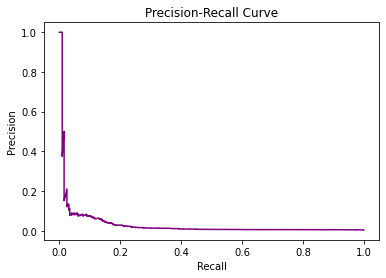

In [151]:
precision7, recall7, thresholds7 = precision_recall_curve(y_test, y_pred_prob7)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall7, precision7, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [152]:
# Calculating the scores
avg_precision_val_7= model7.best_score_
avg_precision_test_7= model7.score(X_test, y_test)
auc_pr_test_7 = auc(recall7, precision7)

In [153]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_7))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_7))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_7))

Avg Precision on Validation Set : 0.0296
Avg Precision on Test Set       : 0.0320
PR-AUC Score on Test Set        : 0.0314


### 1.2.2.2. Borderline SMOTE with XGB<a class="anchor" id="1.2.2.2."></a>

In [237]:
# Define the pipeline
pipeline8 = imbpipeline(steps = [['over', BorderlineSMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', XGBClassifier()]])

# Define the parameter grid for XGB

param_grid8 = {
    'classifier__objective':['binary:logistic'],
    'classifier__random_state': [11],
    'classifier__learning_rate': [0.01],
    'classifier__subsample': [0.805,0.970],
    'classifier__colsample_bytree': [0.776,1] ,
    'classifier__n_estimators': [5000],
    'classifier__max_depth': [3,9]
}

# Define the cross validation structure
stratified_kfold8 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [238]:
# Grid Search
grid_search8 = GridSearchCV(estimator=pipeline8,
                           param_grid=param_grid8,
                           scoring='average_precision',
                           cv=stratified_kfold8,
                           n_jobs=-1,
                           verbose=0)

In [239]:
# Fitting the model and predicting output probabilities
model8= grid_search8.fit(X_train, y_train.values.ravel())
y_pred_prob8=model8.predict_proba(X_test)[:, 1]

In [240]:
model8.best_params_

{'classifier__colsample_bytree': 0.776,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': 9,
 'classifier__n_estimators': 5000,
 'classifier__objective': 'binary:logistic',
 'classifier__random_state': 11,
 'classifier__subsample': 0.97}

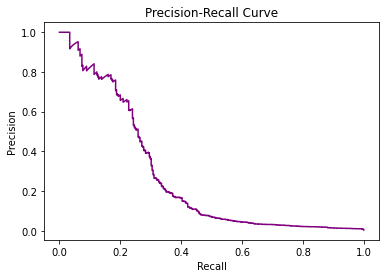

In [241]:
precision8, recall8, thresholds8 = precision_recall_curve(y_test, y_pred_prob8)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall8, precision8, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [242]:
# Calculating the scores
avg_precision_val_8= model8.best_score_
avg_precision_test_8= model8.score(X_test, y_test)
auc_pr_test_8 = auc(recall8, precision8)

In [243]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_8))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_8))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_8))

Avg Precision on Validation Set : 0.2461
Avg Precision on Test Set       : 0.2695
PR-AUC Score on Test Set        : 0.2688


### 1.2.2.3. Borderline SMOTE with RF<a class="anchor" id="1.2.2.3."></a>

In [189]:
# Define the pipeline
pipeline9 = imbpipeline(steps = [['over', BorderlineSMOTE(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', RandomForestClassifier()]])

# Define the parameter grid for RF


param_grid9 = {
    'classifier__random_state': [11],
    'classifier__max_depth': [10] ,
    'classifier__n_estimators': [5000],
    'classifier__max_features': [20,None],
    'classifier__bootstrap': [False]
    
}


# Define the cross validation structure
stratified_kfold9 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [190]:
# Grid Search
grid_search9 = GridSearchCV(estimator=pipeline9,
                           param_grid=param_grid9,
                           scoring='average_precision',
                           cv=stratified_kfold9,
                           n_jobs=-1,
                           verbose=0)

In [191]:
# Fitting the model and predicting output probabilities
model9= grid_search9.fit(X_train, y_train.values.ravel())
y_pred_prob9=model9.predict_proba(X_test)[:, 1]

In [192]:
model9.best_params_

{'classifier__bootstrap': False,
 'classifier__max_depth': 10,
 'classifier__max_features': None,
 'classifier__n_estimators': 5000,
 'classifier__random_state': 11}

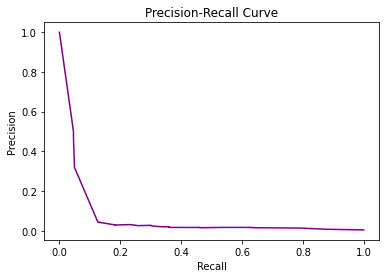

In [193]:
precision9, recall9, thresholds9 = precision_recall_curve(y_test, y_pred_prob9)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall9, precision9, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [194]:
# Calculating the scores
avg_precision_val_9= model9.best_score_
avg_precision_test_9= model9.score(X_test, y_test)
auc_pr_test_9 = auc(recall9, precision9)

In [195]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_9))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_9))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_9))

Avg Precision on Validation Set : 0.0306
Avg Precision on Test Set       : 0.0420
PR-AUC Score on Test Set        : 0.0649


## 1.2.3. ADASYN<a class="anchor" id="1.2.3."></a>

### 1.2.3.1. ADASYN with Logistic Regression<a class="anchor" id="1.2.3.1."></a>

In [154]:
# Define the pipeline
pipeline10 = imbpipeline(steps = [['over', ADASYN(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', LogisticRegression()]])

# Define the parameter grid for Logistic Regression
param_grid10 = {'classifier__max_iter':[3538],
              'classifier__random_state':[11],
              "classifier__penalty": ["l2"],
              "classifier__C": [911.8],
              "classifier__fit_intercept": [True]}

# Define the cross validation structure
stratified_kfold10 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [155]:
# Grid Search
grid_search10 = GridSearchCV(estimator=pipeline10,
                           param_grid=param_grid10,
                           scoring='average_precision',
                           cv=stratified_kfold10,
                           n_jobs=-1,
                           verbose=0)

In [156]:
# Fitting the model and predicting output probabilities
model10= grid_search10.fit(X_train, y_train.values.ravel())
y_pred_prob10= model10.predict_proba(X_test)[:, 1]

In [157]:
model10.best_params_

{'classifier__C': 911.8,
 'classifier__fit_intercept': True,
 'classifier__max_iter': 3538,
 'classifier__penalty': 'l2',
 'classifier__random_state': 11}

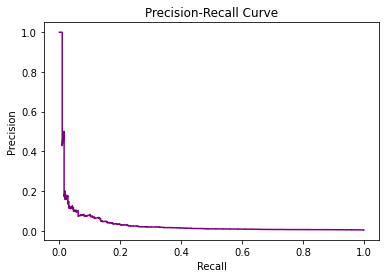

In [158]:
precision10, recall10, thresholds10 = precision_recall_curve(y_test, y_pred_prob10)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall10, precision10, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [159]:
# Calculating the scores
avg_precision_val_10= model10.best_score_
avg_precision_test_10= model10.score(X_test, y_test)
auc_pr_test_10 = auc(recall10, precision10)

In [160]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_10))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_10))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_10))

Avg Precision on Validation Set : 0.0321
Avg Precision on Test Set       : 0.0349
PR-AUC Score on Test Set        : 0.0343


### 1.2.3.2. ADASYN with XGB<a class="anchor" id="1.2.3.2."></a>

In [244]:
# Define the pipeline
pipeline11 = imbpipeline(steps = [['over', ADASYN(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', XGBClassifier()]])

# Define the parameter grid for XGB

param_grid11 = {
    'classifier__objective':['binary:logistic'],
    'classifier__random_state': [11],
    'classifier__learning_rate': [0.01],
    'classifier__subsample': [0.805,0.970],
    'classifier__colsample_bytree': [0.776,1] ,
    'classifier__n_estimators': [5000],
    'classifier__max_depth': [3,9]
}

# Define the cross validation structure
stratified_kfold11 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [245]:
# Grid Search
grid_search11 = GridSearchCV(estimator=pipeline11,
                           param_grid=param_grid11,
                           scoring='average_precision',
                           cv=stratified_kfold11,
                           n_jobs=-1,
                           verbose=0)

In [246]:
# Fitting the model and predicting output probabilities
model11= grid_search11.fit(X_train, y_train.values.ravel())
y_pred_prob11=model11.predict_proba(X_test)[:, 1]

In [247]:
model11.best_params_

{'classifier__colsample_bytree': 0.776,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': 9,
 'classifier__n_estimators': 5000,
 'classifier__objective': 'binary:logistic',
 'classifier__random_state': 11,
 'classifier__subsample': 0.97}

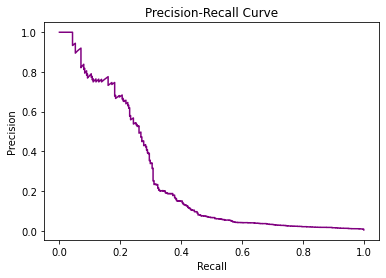

In [248]:
precision11, recall11, thresholds11 = precision_recall_curve(y_test, y_pred_prob11)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall11, precision11, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [249]:
# Calculating the scores
avg_precision_val_11= model11.best_score_
avg_precision_test_11= model11.score(X_test, y_test)
auc_pr_test_11 = auc(recall11, precision11)

In [250]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_11))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_11))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_11))

Avg Precision on Validation Set : 0.2322
Avg Precision on Test Set       : 0.2646
PR-AUC Score on Test Set        : 0.2640


### 1.2.3.3. ADASYN with RF<a class="anchor" id="1.2.3.3."></a>

In [196]:
# Define the pipeline
pipeline12 = imbpipeline(steps = [['over', ADASYN(random_state=11)],
                                ['scaler', StandardScaler()],
                                ['classifier', RandomForestClassifier()]])

# Define the parameter grid for RF


param_grid12 = {
    'classifier__random_state': [11],
    'classifier__max_depth': [10] ,
    'classifier__n_estimators': [5000],
    'classifier__max_features': [20,None],
    'classifier__bootstrap': [False]
    
}


# Define the cross validation structure
stratified_kfold12 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [197]:
# Grid Search
grid_search12 = GridSearchCV(estimator=pipeline12,
                           param_grid=param_grid12,
                           scoring='average_precision',
                           cv=stratified_kfold12,
                           n_jobs=-1,
                           verbose=0)

In [198]:
# Fitting the model and predicting output probabilities
model12= grid_search12.fit(X_train, y_train.values.ravel())
y_pred_prob12=model12.predict_proba(X_test)[:, 1]

In [199]:
model12.best_params_

{'classifier__bootstrap': False,
 'classifier__max_depth': 10,
 'classifier__max_features': 20,
 'classifier__n_estimators': 5000,
 'classifier__random_state': 11}

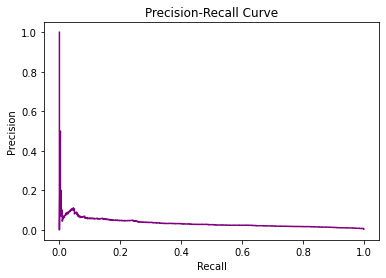

In [200]:
precision12, recall12, thresholds12 = precision_recall_curve(y_test, y_pred_prob12)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall12, precision12, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [201]:
# Calculating the scores
avg_precision_val_12= model12.best_score_
avg_precision_test_12= model12.score(X_test, y_test)
auc_pr_test_12 = auc(recall12, precision12)

In [202]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_12))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_12))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_12))

Avg Precision on Validation Set : 0.0295
Avg Precision on Test Set       : 0.0347
PR-AUC Score on Test Set        : 0.0333


# 1.3. Hybrid Sampling<a class="anchor" id="1.3."></a>

## 1.3.1. SMOTE and Random Undersampling<a class="anchor" id="1.3.1."></a>

### 1.3.1.1. SMOTE and Random Undersampling with Logistic Regression<a class="anchor" id="1.3.1.1."></a>

In [140]:
# Define the pipeline
pipeline4 = imbpipeline(steps = [['over', SMOTE(random_state=11,sampling_strategy=0.1)],
                                ['under', RandomUnderSampler(random_state=11,sampling_strategy=0.5)],
                                ['scaler', StandardScaler()],
                                ['classifier', LogisticRegression()]])

# Define the parameter grid for Logistic Regression
param_grid4 = {'classifier__max_iter':[3538],
              'classifier__random_state':[11],
              "classifier__penalty": ["l2"],
              "classifier__C": [911.8],
              "classifier__fit_intercept": [True]}

# Define the cross validation structure
stratified_kfold4 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [141]:
# Grid Search
grid_search4 = GridSearchCV(estimator=pipeline4,
                           param_grid=param_grid4,
                           scoring='average_precision',
                           cv=stratified_kfold4,
                           n_jobs=-1,
                           verbose=0)

In [142]:
# Fitting the model and predicting output probabilities
model4= grid_search4.fit(X_train, y_train.values.ravel())
y_pred_prob4= model4.predict_proba(X_test)[:, 1]

In [143]:
model4.best_params_

{'classifier__C': 911.8,
 'classifier__fit_intercept': True,
 'classifier__max_iter': 3538,
 'classifier__penalty': 'l2',
 'classifier__random_state': 11}

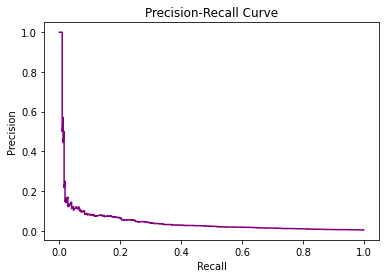

In [144]:
precision4, recall4, thresholds4 = precision_recall_curve(y_test, y_pred_prob4)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall4, precision4, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [145]:
# Calculating the scores
avg_precision_val_4= model4.best_score_
avg_precision_test_4= model4.score(X_test, y_test)
auc_pr_test_4 = auc(recall4, precision4)

In [146]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_4))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_4))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_4))

Avg Precision on Validation Set : 0.0441
Avg Precision on Test Set       : 0.0468
PR-AUC Score on Test Set        : 0.0461


### 1.3.1.2. SMOTE and Random Undersampling with XGB<a class="anchor" id="1.3.1.2."></a>

In [251]:
# Define the pipeline
pipeline5 = imbpipeline(steps = [['over', SMOTE(random_state=11,sampling_strategy=0.1)],
                                ['under', RandomUnderSampler(random_state=11,sampling_strategy=0.5)],
                                ['scaler', StandardScaler()],
                                ['classifier', XGBClassifier()]])

# Define the parameter grid for XGB

param_grid5 = {
    'classifier__objective':['binary:logistic'],
    'classifier__random_state': [11],
    'classifier__learning_rate': [0.01],
    'classifier__subsample': [0.805,0.970],
    'classifier__colsample_bytree': [0.776,1] ,
    'classifier__n_estimators': [5000],
    'classifier__max_depth': [3,9]
}

# Define the cross validation structure
stratified_kfold5 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [252]:
# Grid Search
grid_search5 = GridSearchCV(estimator=pipeline5,
                           param_grid=param_grid5,
                           scoring='average_precision',
                           cv=stratified_kfold5,
                           n_jobs=-1,
                           verbose=0)

In [253]:
# Fitting the model and predicting output probabilities
model5= grid_search5.fit(X_train, y_train.values.ravel())
y_pred_prob5=model5.predict_proba(X_test)[:, 1]

In [254]:
model5.best_params_

{'classifier__colsample_bytree': 0.776,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': 9,
 'classifier__n_estimators': 5000,
 'classifier__objective': 'binary:logistic',
 'classifier__random_state': 11,
 'classifier__subsample': 0.97}

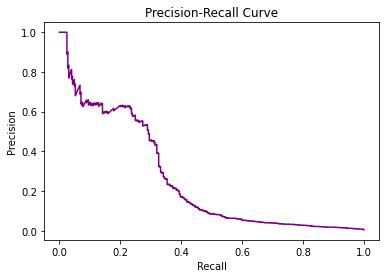

In [255]:
precision5, recall5, thresholds5 = precision_recall_curve(y_test, y_pred_prob5)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall5, precision5, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [256]:
# Calculating the scores
avg_precision_val_5= model5.best_score_
avg_precision_test_5= model5.score(X_test, y_test)
auc_pr_test_5 = auc(recall5, precision5)

In [257]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_5))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_5))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_5))

Avg Precision on Validation Set : 0.2210
Avg Precision on Test Set       : 0.2580
PR-AUC Score on Test Set        : 0.2570


### 1.3.1.3. SMOTE and Random Undersampling with RF<a class="anchor" id="1.3.1.3."></a>

In [258]:
# Define the pipeline
pipeline6 = imbpipeline(steps = [['over', SMOTE(random_state=11,sampling_strategy=0.1)],
                                ['under', RandomUnderSampler(random_state=11,sampling_strategy=0.5)],
                                ['scaler', StandardScaler()],
                                ['classifier', RandomForestClassifier()]])

# Define the parameter grid for RF


param_grid6 = {
    'classifier__random_state': [11],
    'classifier__max_depth': [10] ,
    'classifier__n_estimators': [5000],
    'classifier__max_features': [20,None],
    'classifier__bootstrap': [False]
    
}


# Define the cross validation structure
stratified_kfold6 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [259]:
# Grid Search
grid_search6 = GridSearchCV(estimator=pipeline6,
                           param_grid=param_grid6,
                           scoring='average_precision',
                           cv=stratified_kfold6,
                           n_jobs=-1,
                           verbose=0)

In [260]:
# Fitting the model and predicting output probabilities
model6= grid_search6.fit(X_train, y_train.values.ravel())
y_pred_prob6=model6.predict_proba(X_test)[:, 1]

In [261]:
model6.best_params_

{'classifier__bootstrap': False,
 'classifier__max_depth': 10,
 'classifier__max_features': 20,
 'classifier__n_estimators': 5000,
 'classifier__random_state': 11}

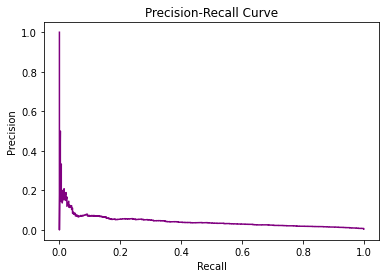

In [262]:
precision6, recall6, thresholds6 = precision_recall_curve(y_test, y_pred_prob6)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall6, precision6, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [263]:
# Calculating the scores
avg_precision_val_6= model6.best_score_
avg_precision_test_6= model6.score(X_test, y_test)
auc_pr_test_6 = auc(recall6, precision6)

In [264]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_6))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_6))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_6))

Avg Precision on Validation Set : 0.0358
Avg Precision on Test Set       : 0.0434
PR-AUC Score on Test Set        : 0.0417


# 2. ALGORITHM-LEVEL SOLUTIONS<a class="anchor" id="2."></a>

## 2.1. Cost-Sensitive Learning<a class="anchor" id="2.1."></a>

### 2.1.1. Cost-Sensitive Learning with Logistic Regression<a class="anchor" id="2.1.1."></a>

In [161]:
# Define the pipeline
pipeline13 = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['classifier', LogisticRegression()]])

# Define the parameter grid for Logistic Regression
param_grid13 = {'classifier__max_iter':[3538, 5000],
              'classifier__random_state':[11],
              "classifier__class_weight": [{0: 1, 1:10},{0: 1, 1:28},{0: 1, 1:50},{0: 1, 1:100},{0: 1, 1:249}],
              "classifier__penalty": ["l2"],
              "classifier__C": [911.8, 1000],
              "classifier__fit_intercept": [True]
               }

# Define the cross validation structure
stratified_kfold13 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [162]:
# Grid Search
grid_search13 = GridSearchCV(estimator=pipeline13,
                           param_grid=param_grid13,
                           scoring='average_precision',
                           cv=stratified_kfold13,
                           n_jobs=-1,
                           verbose=0)

In [163]:
# Fitting the model and predicting output probabilities
model13= grid_search13.fit(X_train, y_train.values.ravel())
y_pred_prob13= model13.predict_proba(X_test)[:, 1]

In [164]:
model13.best_params_

{'classifier__C': 1000,
 'classifier__class_weight': {0: 1, 1: 10},
 'classifier__fit_intercept': True,
 'classifier__max_iter': 3538,
 'classifier__penalty': 'l2',
 'classifier__random_state': 11}

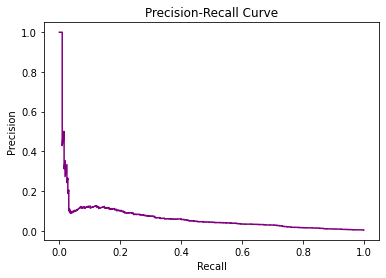

In [165]:
precision13, recall13, thresholds13 = precision_recall_curve(y_test, y_pred_prob13)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall13, precision13, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [166]:
# Calculating the scores
avg_precision_val_13= model13.best_score_
avg_precision_test_13= model13.score(X_test, y_test)
auc_pr_test_13 = auc(recall13, precision13)

In [167]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_13))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_13))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_13))

Avg Precision on Validation Set : 0.0630
Avg Precision on Test Set       : 0.0668
PR-AUC Score on Test Set        : 0.0659


### 2.1.2. Cost-Sensitive Learning with XGB - Bayesian Search <a class="anchor" id="2.1.2."></a>

In [56]:
# Define the pipeline
pipeline20 = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['classifier', XGBClassifier()]])

# Define the parameter grid for XGB

param_grid20 = {
    'classifier__objective':['binary:logistic'],
    'classifier__random_state': [11],
    'classifier__learning_rate': Real(0.01, 0.2, prior="log-uniform"),
    'classifier__subsample': Real(0.5, 1),
    'classifier__colsample_bytree': Real(0.5, 1),
    'classifier__n_estimators': Integer(1, 5000),
    'classifier__max_depth': Integer(2, 10),
    'classifier__scale_pos_weight': Integer(1,400)
}

# Define the cross validation structure
stratified_kfold20 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [57]:
# Bayesian Search
grid_search20 = BayesSearchCV(estimator=pipeline20,
                           search_spaces=param_grid20,
                           scoring='average_precision',
                           cv=stratified_kfold20,
                           n_jobs=-1,
                           verbose=0)

In [58]:
# Fitting the model and predicting output probabilities
model20= grid_search20.fit(X_train, y_train.values.ravel())
y_pred_prob20=model20.predict_proba(X_test)[:, 1]

In [59]:
model20.best_params_

OrderedDict([('classifier__colsample_bytree', 1.0),
             ('classifier__learning_rate', 0.01),
             ('classifier__max_depth', 9),
             ('classifier__n_estimators', 5000),
             ('classifier__objective', 'binary:logistic'),
             ('classifier__random_state', 11),
             ('classifier__scale_pos_weight', 28),
             ('classifier__subsample', 0.8055244616451593)])

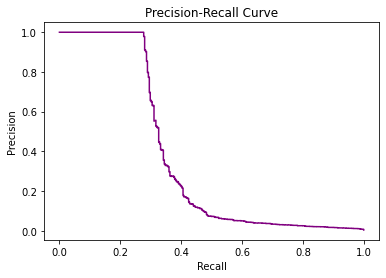

In [60]:
precision20, recall20, thresholds20 = precision_recall_curve(y_test, y_pred_prob20)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall20, precision20, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [61]:
# Calculating the scores
avg_precision_val_20= model20.best_score_
avg_precision_test_20= model20.score(X_test, y_test)
auc_pr_test_20 = auc(recall20, precision20)

In [62]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_20))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_20))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_20))

Avg Precision on Validation Set : 0.3075
Avg Precision on Test Set       : 0.3632
PR-AUC Score on Test Set        : 0.3630


### 2.1.3. Cost-Sensitive Learning with XGB <a class="anchor" id="2.1.3."></a>

In [266]:
# Define the pipeline
pipeline14 = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['classifier', XGBClassifier()]])

# Define the parameter grid for XGB

param_grid14 = {
    'classifier__objective':['binary:logistic'],
    'classifier__random_state': [11],
    'classifier__learning_rate': [0.01],
    'classifier__subsample': [0.805,0.970],
    'classifier__colsample_bytree': [0.776,1] ,
    'classifier__n_estimators': [5000],
    'classifier__max_depth': [3,9],
    'classifier__scale_pos_weight': [28,249]
}


# Define the cross validation structure
stratified_kfold14 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [267]:
# Grid Search
grid_search14 = GridSearchCV(estimator=pipeline14,
                           param_grid=param_grid14,
                           scoring='average_precision',
                           cv=stratified_kfold14,
                           n_jobs=-1,
                           verbose=0)

In [268]:
# Fitting the model and predicting output probabilities
model14= grid_search14.fit(X_train, y_train.values.ravel())
y_pred_prob14=model14.predict_proba(X_test)[:, 1]

In [269]:
model14.best_params_

{'classifier__colsample_bytree': 1,
 'classifier__learning_rate': 0.01,
 'classifier__max_depth': 9,
 'classifier__n_estimators': 5000,
 'classifier__objective': 'binary:logistic',
 'classifier__random_state': 11,
 'classifier__scale_pos_weight': 28,
 'classifier__subsample': 0.805}

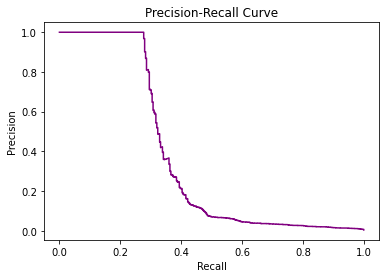

In [270]:
precision14, recall14, thresholds14 = precision_recall_curve(y_test, y_pred_prob14)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall14, precision14, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [271]:
# Calculating the scores
avg_precision_val_14= model14.best_score_
avg_precision_test_14= model14.score(X_test, y_test)
auc_pr_test_14 = auc(recall14, precision14)

In [272]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_14))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_14))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_14))

Avg Precision on Validation Set : 0.3068
Avg Precision on Test Set       : 0.3645
PR-AUC Score on Test Set        : 0.3643


### 2.1.3.1. Further Thresholding<a class="anchor" id="2.1.3.1."></a>

In [284]:
# The threshold is determined according to the highest f1 score

# Calculate the f-score
fscore = (2 * precision14 * recall14) / (precision14 + recall14)

# Find the optimal threshold
index = np.argmax(fscore)
thresholdOpt = round(thresholds14[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall14[index], ndigits = 4)
precisionOpt = round(precision14[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))


Best Threshold: 0.7736999988555908 with F-Score: 0.4344
Recall: 0.28, Precision: 0.9681


In [356]:
# The predictions are created for the default threshold - 0.5
y_pred_baseline = (model14.predict_proba(X_test)[:,1] >= 0.5).astype(bool)

(2.5, -0.5)

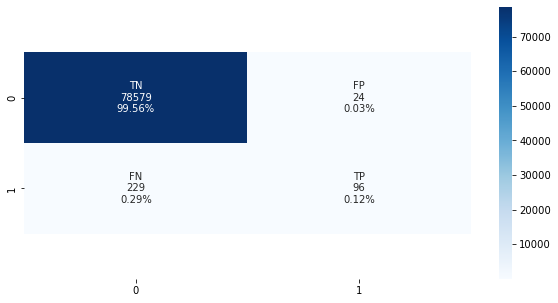

In [357]:
#The confusion matrix for the XGB + CSL is formed for baseline threshold
cmat = metrics.confusion_matrix(y_test, y_pred_baseline) 
plt.figure(figsize=(10,5))
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                cmat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmat.flatten()/np.sum(cmat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cmat, annot=labels, fmt="", cmap='Blues')

#The top and bottom of the y axis is calibrated so that table seems complete.(A problem about the matplotlib version is handled)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [285]:
# The predictions are created for the optimal threshold
y_pred_best = (model14.predict_proba(X_test)[:,1] >= 0.7736999988555908).astype(bool)

(2.5, -0.5)

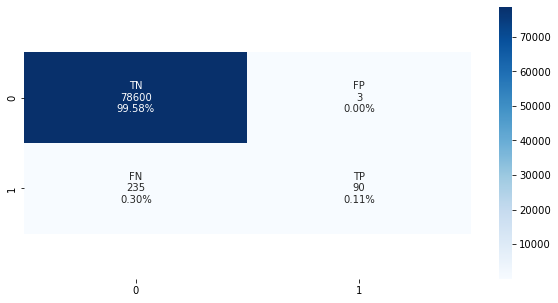

In [286]:
#The confusion matrix for the XGB + CSL is formed for optimal threshold
cmat = metrics.confusion_matrix(y_test, y_pred_best) 
plt.figure(figsize=(10,5))
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                cmat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmat.flatten()/np.sum(cmat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax=sns.heatmap(cmat, annot=labels, fmt="", cmap='Blues')

#The top and bottom of the y axis is calibrated so that table seems complete.(A problem about the matplotlib version is handled)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### 2.1.4. Cost-Sensitive Learning with RF - Bayesian Search<a class="anchor" id="2.1.4."></a>

In [4]:
# Define the pipeline
pipeline24 = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['classifier', RandomForestClassifier()]])

# Define the parameter grid for RF

param_grid24 = {
    'classifier__random_state': [11],
    'classifier__max_features': Integer(1, 20),
    'classifier__max_depth': Integer(2, 10),
    'classifier__n_estimators': Integer(100, 5000),
    'classifier__min_samples_split': Integer(2, 100),
    'classifier__min_samples_leaf': Integer(1, 50),
    'classifier__bootstrap': Categorical([True, False]),
    'classifier__class_weight': Categorical(['balanced', 'balanced_subsample'])  
}



# Define the cross validation structure
stratified_kfold24 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [5]:
# Bayesian Search
grid_search24 = BayesSearchCV(estimator=pipeline24,
                           search_spaces=param_grid24,
                           scoring='average_precision',
                           cv=stratified_kfold24,
                           n_jobs=-1,
                           verbose=0)

In [6]:
# Fitting the model and predicting output probabilities
model24= grid_search24.fit(X_train, y_train.values.ravel())
y_pred_prob24=model24.predict_proba(X_test)[:, 1]

In [7]:
model24.best_params_

OrderedDict([('classifier__bootstrap', False),
             ('classifier__class_weight', 'balanced_subsample'),
             ('classifier__max_depth', 10),
             ('classifier__max_features', 20),
             ('classifier__min_samples_leaf', 1),
             ('classifier__min_samples_split', 2),
             ('classifier__n_estimators', 5000),
             ('classifier__random_state', 11)])

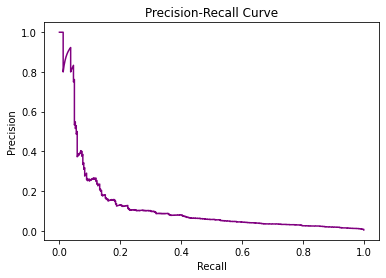

In [8]:
precision24, recall24, thresholds24 = precision_recall_curve(y_test, y_pred_prob24)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall24, precision24, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [9]:
# Calculating the scores
avg_precision_val_24= model24.best_score_
avg_precision_test_24= model24.score(X_test, y_test)
auc_pr_test_24 = auc(recall24, precision24)

In [10]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_24))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_24))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_24))

Avg Precision on Validation Set : 0.1213
Avg Precision on Test Set       : 0.1232
PR-AUC Score on Test Set        : 0.1224


### 2.1.5. Cost-Sensitive Learning with RF<a class="anchor" id="2.1.5."></a>

In [273]:
# Define the pipeline
pipeline15 = imbpipeline(steps = [['scaler', StandardScaler()],
                                ['classifier', RandomForestClassifier()]])

# Define the parameter grid for RF


param_grid15 = {
    'classifier__random_state': [11],
    'classifier__max_depth': [10] ,
    'classifier__n_estimators': [5000],
    'classifier__max_features': [20,None],
    'classifier__bootstrap': [False],
    'classifier__class_weight': ['balanced','balanced_subsample',{0: 1, 1:10},{0: 1, 1:28},{0: 1, 1:100}]
    
}


# Define the cross validation structure
stratified_kfold15 = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)

In [274]:
# Grid Search
grid_search15 = GridSearchCV(estimator=pipeline15,
                           param_grid=param_grid15,
                           scoring='average_precision',
                           cv=stratified_kfold15,
                           n_jobs=-1,
                           verbose=0)

In [275]:
# Fitting the model and predicting output probabilities
model15= grid_search15.fit(X_train, y_train.values.ravel())
y_pred_prob15=model15.predict_proba(X_test)[:, 1]

In [276]:
model15.best_params_

{'classifier__bootstrap': False,
 'classifier__class_weight': {0: 1, 1: 10},
 'classifier__max_depth': 10,
 'classifier__max_features': 20,
 'classifier__n_estimators': 5000,
 'classifier__random_state': 11}

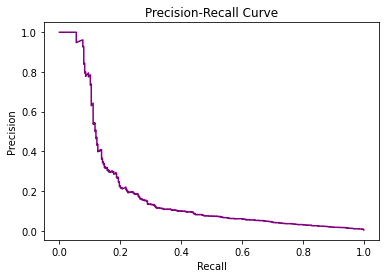

In [277]:
precision15, recall15, thresholds15 = precision_recall_curve(y_test, y_pred_prob15)
#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall15, precision15, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [278]:
# Calculating the scores
avg_precision_val_15= model15.best_score_
avg_precision_test_15= model15.score(X_test, y_test)
auc_pr_test_15 = auc(recall15, precision15)

In [279]:
# Showing the scores
print('Avg Precision on Validation Set : {:0.4f}'.format(avg_precision_val_15))
print('Avg Precision on Test Set       : {:0.4f}'.format(avg_precision_test_15))
print('PR-AUC Score on Test Set        : {:0.4f}'.format(auc_pr_test_15))

Avg Precision on Validation Set : 0.1936
Avg Precision on Test Set       : 0.1903
PR-AUC Score on Test Set        : 0.1898


### Saving the models to disc

In [287]:
#Writing the models to disc.
#with open('model1.pkl', 'wb') as file_name:
#    pickle.dump(model1, file_name)
#with open('model2.pkl', 'wb') as file_name:
#    pickle.dump(model2, file_name)
#with open('model3.pkl', 'wb') as file_name:
#    pickle.dump(model3, file_name)
#with open('model4.pkl', 'wb') as file_name:
#    pickle.dump(model4, file_name)
#with open('model5.pkl', 'wb') as file_name:
#    pickle.dump(model5, file_name)
#with open('model6.pkl', 'wb') as file_name:
#    pickle.dump(model6, file_name)
#with open('model7.pkl', 'wb') as file_name:
#    pickle.dump(model7, file_name)
#with open('model8.pkl', 'wb') as file_name:
#    pickle.dump(model8, file_name)
#with open('model9.pkl', 'wb') as file_name:
#    pickle.dump(model9, file_name)
#with open('model10.pkl', 'wb') as file_name:
#    pickle.dump(model10, file_name)
#with open('model11.pkl', 'wb') as file_name:
#    pickle.dump(model11, file_name)
#with open('model12.pkl', 'wb') as file_name:
#    pickle.dump(model12, file_name)
#with open('model13.pkl', 'wb') as file_name:
#    pickle.dump(model13, file_name)
#with open('model14.pkl', 'wb') as file_name:
#    pickle.dump(model14, file_name)
#with open('model15.pkl', 'wb') as file_name:
#    pickle.dump(model15, file_name)
#with open('model16.pkl', 'wb') as file_name:
#    pickle.dump(model16, file_name)
#with open('model17.pkl', 'wb') as file_name:
#    pickle.dump(model17, file_name)
#with open('model18.pkl', 'wb') as file_name:
#    pickle.dump(model18, file_name)
#with open('model19.pkl', 'wb') as file_name:
#    pickle.dump(model19, file_name)
#with open('model20.pkl', 'wb') as file_name:
#    pickle.dump(model20, file_name)
#with open('model21.pkl', 'wb') as file_name:
#    pickle.dump(model21, file_name)
#with open('model22.pkl', 'wb') as file_name:
#    pickle.dump(model22, file_name)
#with open('model24.pkl', 'wb') as file_name:
#    pickle.dump(model24, file_name)